<a href="https://colab.research.google.com/github/JuanZapa7a/Medical-Image-Processing/blob/main/Using_Pytorch_to_fight_cancer_(IV).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Pytorch to Fight Cancer

## 1. ALL IN!!!!


LET'S GET STARTED!!!!

### Setting our work environment

First, we check if GPU is connected. The `nvidia-smi` command (NVIDIA System Management Interface) is used to monitor and manage NVIDIA GPUs (Graphics Processing Units) in a system. It provides detailed information about the status and performance of the GPUs, including GPU utilization, temperature, memory usage, processes utilizing the GPU, and more.

**[`nvidia-smi`](https://www.baeldung.com/linux/nvidia-smi-full-gpu-details)** is a command-line utility provided by NVIDIA that helps you manage and monitor NVIDIA GPU devices. It stands for NVIDIA System Management Interface.

---
**Display Basic GPU Information**

---

In [1]:
!nvidia-smi

Fri Jun 21 08:09:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Setting our workspace: `/content` and `/content/datasets`



---
**Setting our Home**

---

We save the root directory of the project '/content' as 'HOME' since we will be navigating through the directory to have multiple projects under the same HOME. Additionally, we will have the datasets in the 'datasets' directory, so all datasets are easily accessible for any project.

In [2]:
# Setting our $HOME to /content

import os
HOME = os.getcwd()
print(HOME)

/content


Next, it imports the drive module from the google.colab library, which provides functionalities for mounting Google Drive in Google Colab.

Additionally, Google Drive is mounted in Google Colab and made available at the path /content/drive. The user will be prompted to authorize access to Google Drive. Once authorized, the content of Google Drive will be accessible from that point onwards in the Colab notebook.

---
**Mount Google Drive**

---

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Load a dataset (dataloader)

Create the dataset directory (if it doesn't exist), where we are going to save the dataset with which we are going to train our CNN.

---
**Create a directory where we can save our dataset**

---

In [4]:
import os
datasets_dir = os.path.join(HOME, "datasets")
os.makedirs(datasets_dir, exist_ok=True)
print(os.getcwd())

/content


Check if the file specified by `file` does not exist in the current directory. If it doesn't exist, the code block inside the conditional, which in this case would be downloading the file from the specified URL, is executed. then, it extracts the contents of `exp0.zip` into the current directory quietly, overwriting any existing files if necessary.

---
**Change to new directory datasets**

---

In [5]:
# Change to new datasets folder
os.chdir(datasets_dir)
print('dataset_dir =', os.getcwd())
if  not os.path.isfile('exp0.zip'):
  !wget -q https://www.dropbox.com/s/7ir1jixrs1aw55n/exp0.zip
!unzip -qq -o exp0.zip

dataset_dir = /content/datasets


### Inspect the Dataset

The dataset contains several thousand photos of cell images in two subdirectories (classes) with one cell image per class. The directory structure is as follows thanks to this snipet:

---
**Display the datapath structure.**

---

In [6]:
import os

def print_directory_tree(root_dir, level=0):
    """
    Recursively prints the directory tree structure, only listing directories.
    """
    prefix = " " * (level * 4) + "|-- " if level > 0 else ""
    print(prefix + os.path.basename(root_dir))

    if os.path.isdir(root_dir):
        for item in os.listdir(root_dir):
            item_path = os.path.join(root_dir, item)
            if os.path.isdir(item_path):
                print_directory_tree(item_path, level + 1)

# Define the data directory
data_dir = datasets_dir

# Print the directory tree
print_directory_tree(data_dir)

datasets
    |-- exp0
        |-- train
            |-- class_1
            |-- class_0
        |-- val
            |-- class_1
            |-- class_0
        |-- test
            |-- class_1
            |-- class_0
    |-- __MACOSX
        |-- exp0
            |-- train
                |-- class_1
                |-- class_0
            |-- val
                |-- class_1
                |-- class_0
            |-- test
                |-- class_1
                |-- class_0



---
**Display 8 images from a class from test**

---

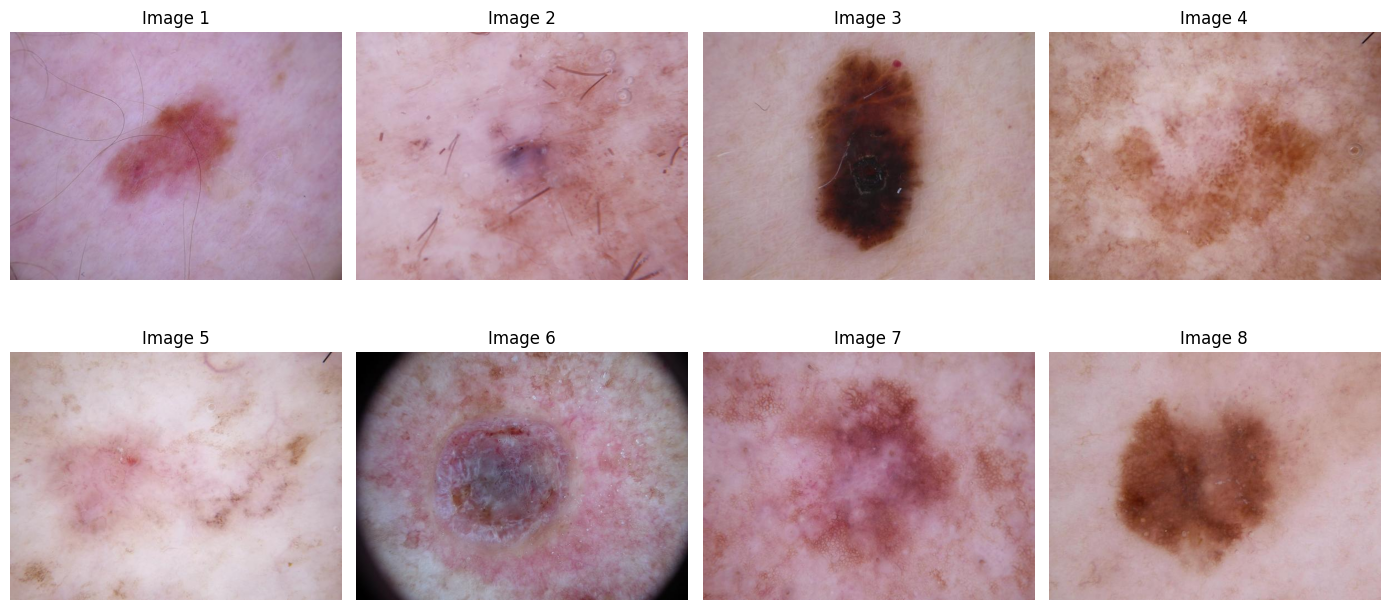


 Size of image:  (450, 600, 3)


In [7]:
# creates a figure with subplots arranged in a 2x4 grid
import matplotlib.pyplot as plt
import glob
import matplotlib.image as mpimg

# Directory of the images
image_directory = f'/content/datasets/exp0/test/class_1/'

# List of image paths
image_paths = glob.glob(image_directory + '*.jpg')[:8]

# Set up the figure with subplots
fig, axs = plt.subplots(2, 4, figsize=(14, 7))

# Iterate through the images and display them in the subplots
for i, image_path in enumerate(image_paths):
    row = i // 4
    col = i % 4
    img = mpimg.imread(image_path)
    axs[row, col].imshow(img)
    axs[row, col].set_title(f'Image {i + 1}')
    axs[row, col].axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()
print("\n Size of image: ", img.shape)

### Setting a Dataloader

The purpose of a **DataLoader** is fundamental in the context of machine learning and deep learning, especially when working with large or complex datasets. Its main purpose is to facilitate the efficient loading and manipulation of data during model training.



---
**Load Libraries for DataLoader**

---

In [ ]:
import torch
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

>**Note**: These time magics (%time and %%time) will give you information about how long it takes to execute the code in the respective cell in Google Colab. The results will be displayed below the cell after the execution is completed.

---
**Create a Dataloader for train, val y test sets**

---

In [ ]:
%%time

# 1. Calculate the mean and standard deviation on the training set.
# train, validation and test data directory

train_dir = "/content/datasets/exp0/train/"
val_dir  = "/content/datasets/exp0/test/"
test_dir   = "/content/datasets/exp0/val/"

# transform to calculate mean and standard desviation
transform = transforms.Compose([
    transforms.ToTensor()  # transform images to tensor
])

# Load the ImageFolder dataset and apply the transformation
dataset = datasets.ImageFolder(root= train_dir, transform=transform)

# it's better to use a loader to retrieve images (tensors)
loader = DataLoader(dataset, batch_size=1, shuffle=False)

# Initialize variables to store the sum of pixel values and
# standard deviation.
# These variables are set to floating-point zeros to ensure
# accurate calculations.
mean_sum = 0.0
std_sum = 0.0
total_samples = 0

# Iterates over the data loader (loader),
# calculates the mean and standard deviation across all channels
# for each batch(0) and spatial dimensions (height(2) and width(3))
for images, _ in loader:
    mean_sum += torch.mean(images, dim=[0, 2, 3])
    std_sum += torch.std(images, dim=[0, 2, 3])
    total_samples += 1

mean = mean_sum / total_samples
std = std_sum / total_samples

print("Total train samples:", total_samples)
print("Mean:", mean)
print("Std:", std)

Total train samples: 2700
Mean: tensor([0.7513, 0.5535, 0.5788])
Std: tensor([0.0921, 0.1196, 0.1349])
CPU times: user 27.7 s, sys: 1.41 s, total: 29.2 s
Wall time: 30.2 s


---
**Normalize the dataloaders using Statistics**

---

- **Normalization**: Normalization is crucial for ensuring that pixel values across images are on a similar scale, which helps in stabilizing and speeding up the training process of deep neural networks.  
- **Dataset Preparation**: Each dataset (`train_data`, `val_set`, `test_set`) is prepared with consistent transformations and normalization, facilitating uniformity in data processing across training, validation, and testing phases.

This setup ensures that the datasets are properly preprocessed and ready to be used in training and evaluating machine learning models, particularly deep neural networks, using PyTorch.

In [ ]:
%%time

# 2. Normalize the training set using these statistics.
train_set = datasets.ImageFolder(train_dir,transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)])
)

# 3. Normalize the test and validation set using the same statistics
# calculated on the training set.
val_set = datasets.ImageFolder(val_dir,transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)])
)

test_set = datasets.ImageFolder(test_dir,transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)])
)

print(f"Length of Train Data :{len(train_set)}")
print(f"Length of Validation Data : {len(val_set)}")
print(f"Length of Test Data : {len(test_set)}")

classes = train_set.classes
print('Classes: ', classes)

Length of Train Data :2700
Length of Validation Data : 600
Length of Test Data : 300
Classes:  ['class_0', 'class_1']
CPU times: user 16.2 ms, sys: 2.02 ms, total: 18.3 ms
Wall time: 18.3 ms


### Displaying all classes

Let us show one example for each class, for fun. As we've transformed the image by normalizing it, we should undo the transformation before visualizing the image.

---
**Display one example from each class**

---


CPU times: user 3.96 s, sys: 64.8 ms, total: 4.03 s
Wall time: 4 s


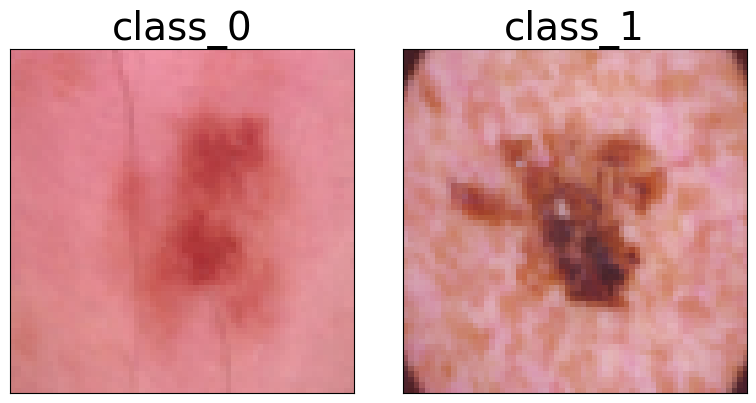

In [ ]:
%%time
inv_normalize = transforms.Normalize(
  mean= [-m/s for m, s in zip(mean, std)],
  std= [1/s for s in std]
)

fig, ax = plt.subplots(nrows=1, ncols=len(classes), figsize=(2*4,1*4),
                       subplot_kw={'facecolor': "#ebf5ff"})

for i, ax in enumerate(ax.flatten()):
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(classes[i], fontsize=28)
  img = next(img for img,label in train_set if label == i)
  #ax.imshow(img.permute(1,2,0)) # for normalized channels
  ax.imshow(inv_normalize(img).permute(1,2,0)) # for unnormalized

fig.tight_layout()


## 3. Define a [Convolutional Neural Network](https://pytorch.org/docs/stable/nn.html)

---
**import Libraries**

---


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

---
**Define the Model**

---
Our idea is to load a previously trained model and retrain it using early stopping. To do this, we need to replicate the neural network model that we previously saved.

In [ ]:
# Large Model
class myCNN(nn.Module):
    def __init__(self): # defines the constructor method __init__()
                        # for the myCNN class. This method is called
                        # when an instance of the class is created.
        super().__init__() # calls the constructor of the parent class
                           # (nn.Module) using Python's super() function.
                           # It initializes the parent class, allowing the
                           # myCNN class to inherit functionality from nn.Module.

        self.network = nn.Sequential(

            # Layer 1: Conv2d
            # Input: (batch_size, 3, 64, 64)
            # Output: (batch_size, 32, 64, 64)
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),

            # Layer 2: Conv2d
            # Input: (batch_size, 32, 64, 64)
            # Output: (batch_size, 64, 64, 64)
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            # Layer 3: MaxPool2d
            # Input: (batch_size, 64, 64, 64)
            # Output: (batch_size, 64, 32, 32)
            nn.MaxPool2d(2, 2),

            # Layer 4: Conv2d
            # Input: (batch_size, 64, 32, 32)
            # Output: (batch_size, 128, 32, 32)
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            # Layer 5: Conv2d
            # Input: (batch_size, 128, 32, 32)
            # Output: (batch_size, 128, 32, 32)
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            # Layer 6: MaxPool2d
            # Input: (batch_size, 128, 32, 32)
            # Output: (batch_size, 128, 16, 16)
            nn.MaxPool2d(2, 2),

            # Layer 7: Conv2d
            # Input: (batch_size, 128, 16, 16)
            # Output: (batch_size, 256, 16, 16)
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            # Layer 8: Conv2d
            # Input: (batch_size, 256, 16, 16)
            # Output: (batch_size, 256, 16, 16)
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            # Layer 9: MaxPool2d
            # Input: (batch_size, 256, 16, 16)
            # Output: (batch_size, 256, 8, 8)
            nn.MaxPool2d(2, 2),

            # Layer 10: Flatten
            # Input: (batch_size, 256, 8, 8)
            # Output: (batch_size, 16384)
            nn.Flatten(),

            # Layer 11: Linear
            # Input: (batch_size, 16384)
            # Output: (batch_size, 128)
            nn.Linear(16384, 128),
            nn.ReLU(),

            # Layer 12: Linear
            # Input: (batch_size, 128)
            # Output: (batch_size, 64)
            nn.Linear(128, 64),
            nn.ReLU(),

            # Layer 13: Linear
            # Input: (batch_size, 64)
            # Output: (batch_size, 2)
            nn.Linear(64, 2)
        )
    # The forward method takes a single argument xb,
    # which represents the input data to the neural network.
    # Inside the forward method, the input xb is passed through the
    # neural network layers defined in self.network. The result of this
    # computation is then returned as the output of the forward method.
    def forward(self, xb):
        return self.network(xb)

---
**Setting CUDA environment**

---

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")


model = myCNN().to(device)
if torch.cuda.device_count() > 1:
  print("Let's use", torch.cuda.device_count(), "GPUs!")
  # dim = 0 [30, xxx] -> [10, ...], [10, ...], [10, ...] on 3 GPUs
  model = nn.DataParallel(model)

print(model)

Using cuda device
myCNN(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=16384, out_features=128, bias=True)
    (17): ReLU()
    (18): Linear



---
**Display the summary of our model**

---

In [ ]:
!pip install torchsummary -q

from torchsummary import summary

summary(model, (3,64,64)) # input = [3,64,64]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 64, 64]             896
              ReLU-2           [-1, 32, 64, 64]               0
            Conv2d-3           [-1, 64, 64, 64]          18,496
              ReLU-4           [-1, 64, 64, 64]               0
         MaxPool2d-5           [-1, 64, 32, 32]               0
            Conv2d-6          [-1, 128, 32, 32]          73,856
              ReLU-7          [-1, 128, 32, 32]               0
            Conv2d-8          [-1, 128, 32, 32]         147,584
              ReLU-9          [-1, 128, 32, 32]               0
        MaxPool2d-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 256, 16, 16]         295,168
             ReLU-12          [-1, 256, 16, 16]               0
           Conv2d-13          [-1, 256, 16, 16]         590,080
             ReLU-14          [-1, 256,

### Define a Loss function and optimizer




---

**Define a Loss Function and a Optimizer**

---


In [ ]:
criterion = nn.CrossEntropyLoss()
#criterion = nn.BCELoss()
#criterion = nn.BCEWithLogitsLoss()
# Define your optimizer
optimizer = torch.optim.SGD(model.parameters(),
                            lr=0.001,
                            momentum=0.9,
                            weight_decay=0.001 )
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### Defining Training Loop

---
**Defining train**

---

In [ ]:
def train(dataloader, model, criterion, optimizer):
  running_loss, corrects, current = 0, 0, 0
  size = len(dataloader.dataset) # number images from dataset
  print(f"Training:")
  model.train() #training mode on
  loop = tqdm(train_dataloader) # Initialize a progress bar
  for batch, (X, y) in enumerate(loop):
    # take data (X) and label (y) from a batch
    X, y = X.to(device), y.to(device) # Move the data and labels
                                      # to the device (CPU or GPU)

    # forward pass
    preds = model(X) # Compute predictions
    loss = criterion(preds, y) # Compute the loss between predictions and labels

    # backpropagation
    optimizer.zero_grad()   # zero the gradient buffers
    loss.backward()         # compute gradients to backwards
    optimizer.step()        # Does the "update weights" of model

    # Calculate Output Metrics training_loss, training_accuracy

    # 1. loss.item() contains the loss of entire mini-batch converted to scalar
    running_loss += loss.item() # Accumulate the loss for this batch

    # 2. current image (last image in the batch) for progressive bar
    current += len(X) # Update the current number of processed images

    # 3. From the predictions, I select the index (class) of the one with
    # the highest value and compare it with the label (class). The boolean value
    # is converted into a float (true becomes 1, false becomes 0), and all are
    # summed up. Finally, 'item' converts them into a scalar value.
    # This way, 'corrects' reflects the number of correct predictions (accuracy)
    corrects += (preds.argmax(1) == y).type(torch.float).sum().item()

    # 4. running loss is the sum of our loss. Training loss is a running average
    # through batches
    training_loss = running_loss/(batch+1)

    # 5. Training accuracy = number of corrects predictions/number of processed images
    training_accuracy = corrects/current

    # Update the progress bar with current epoch, batch, and metrics
    loop.set_description(f'[{epoch + 1}/{epochs} epochs, {current:>5d}/{len(train_dataloader.dataset):>5d} data]')
    loop.set_postfix(Training_Loss=training_loss, Accuracy=f'{100*corrects/current:>0.1f}%')

  return training_loss, training_accuracy

---
**Defining val**

---

In [ ]:
def val(dataloader, model, criterion):
  size = len(dataloader.dataset) # number images from dataset to evaluate
  num_batches = len(dataloader)  # number of batches

  # Evaluation (test)) Mode
  model.eval()

  val_loss, corrects = 0, 0
  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)

      # prediction for a dataset not used in training
      # compute prediction error and number of corrects
      # through batches
      preds = model(X)
      val_loss += criterion(preds, y).item()
      corrects += (preds.argmax(1) == y).type(torch.float).sum().item()
  val_loss /= num_batches
  corrects /= size
  print(f"Val: \n Accuracy: {(100*corrects):>0.1f}%, val_Loss: {val_loss:>8f} \n")

  return val_loss, corrects

Later, we will define the training loop.

---
**Loading a model previously training**

---

Where am I?

In [ ]:
import os
os.chdir('/content')
HOME = os.getcwd()
print(HOME)
datasets_dir = os.path.join(HOME, "datasets")
print(datasets_dir)

/content
/content/datasets


Load previously weights saved model. We  need the architecture of saved model in order to weights matching with the layers of the model.

---
**Upload files from local**

---

metrics_myCNN.csv

myCNN.pth

```python
# batch size defines how many training or testing samples
# to use in a single iteration
batch_size = 32
# epochs define the number of iterations
epochs = 100
# num_classes define the number of the class
num_classes = len(classes)
print(f"Number of Classes: {num_classes}")
```


In [ ]:
from google.colab import files
import shutil
import os

# To upload files from your local machine
uploaded = files.upload()

# Listar los archivos cargados y moverlos al directorio /content
for filename in uploaded.keys():
    print(f'File loaded: {filename}')
    source_path = f'{filename}'
    destination_path = datasets_dir+f'/{filename}'
    shutil.move(source_path, destination_path)

# To check the contents of the directory /content
print("Directory contents /content/datasets:")
os.listdir(datasets_dir)

Saving metrics_myCNN_daug.csv to metrics_myCNN_daug.csv
Saving myCNN_daug.pth to myCNN_daug.pth
File loaded: metrics_myCNN_daug.csv
File loaded: myCNN_daug.pth
Directory contents /content/datasets:


['myCNN_daug.pth', '__MACOSX', 'metrics_myCNN_daug.csv', 'exp0.zip', 'exp0']

Once the file is uploaded, you can load the model and optimizer state from the file.

---
**Load the model previously saved**

---

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import csv

# Definir el criterio de pérdida
criterion = nn.CrossEntropyLoss()

# Definir el optimizador
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.001)

# Cargar el checkpoint
checkpoint = torch.load(datasets_dir+"/myCNN_daug.pth", map_location=device)

# Restaura el estado del modelo
model.load_state_dict(checkpoint['model'])

# Restaura el estado del optimizador
# optimizer.load_state_dict(checkpoint['optimizer'])



print("Model and optimizer loaded successfully.")
print(model)

Model and optimizer loaded successfully.
myCNN(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=16384, out_features=128, bias=True)
    (17): 

---
**Displaying the metrics curves from a saved model**

---

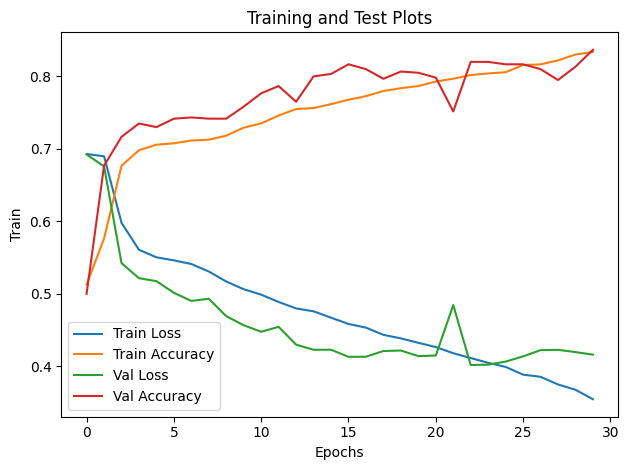

In [ ]:
import csv
import matplotlib.pyplot as plt

#
epochs = []
loss_train_history = []
accuracy_train_history = []
loss_val_history = []
accuracy_val_history = []
with open(datasets_dir+'/metrics_myCNN_daug.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        epochs.append(int(row['Epoch']))
        loss_train_history.append(float(row['Train Loss']))
        accuracy_train_history.append(float(row['Train Accuracy']))
        loss_val_history.append(float(row['Val Loss']))
        accuracy_val_history.append(float(row['Val Accuracy']))
    epochs=len(epochs)

fig, ax = plt.subplots()

ax.set_title('Training and Test Plots')
ax.plot(range(epochs), loss_train_history, label="Train Loss")
ax.plot(range(epochs), accuracy_train_history, label="Train Accuracy")
ax.plot(range(epochs), loss_val_history, label="Val Loss")
ax.plot(range(epochs), accuracy_val_history, label="Val Accuracy")
ax.set_xlabel("Epochs")
ax.set_ylabel("Train")
ax.legend()

fig.tight_layout()



# Early Stopping

Early stopping is a technique used in machine learning model training to halt training before the model begins to overfit the training data. This is done by monitoring a metric of interest on the validation set and stopping training when the metric ceases to improve for a certain number of consecutive epochs.

You can use the Python standard library os to create a directory named `"train"` in the current directory and then save the trained models (pth) in that directory. Here's an example of how to do it:


To create directories named `train1`, `train2`, etc., each time you execute a training loop, you can modify the code to check the number of existing training directories and then create the next directory in sequence. Here's an example of how you could do this:

---
**Create Train directories**

---

In [ ]:
import os
import torchvision.models as models

def create_train_dir():
  """
  Creates a directory named train within the current directory.
  """
  # Current directory
  current_dir = os.getcwd()
  print(current_dir)

  # Base path to the "train" directory
  base_train_dir = os.path.join(current_dir, 'train')

  # Determine the next training directory name
  train_dirs = [d for d in os.listdir(current_dir) if d.startswith('train') and d[5:].isdigit()]
  train_dirs.sort(key=lambda x: int(x[5:]) if x[5:].isdigit() else -1)
  next_train_num = 1 if not train_dirs else int(train_dirs[-1][5:]) + 1
  train_dir = os.path.join(current_dir, f'train{next_train_num}')

  # Create the next training directory
  os.makedirs(train_dir, exist_ok=True)
  print(f"Training directory: {train_dir}")
  return train_dir

### Settings Hyperparameters

We are going to define some training parameters for the network, such as the number of batches, epochs, and classes in the dataset because they are needed for dataloaders in order to set up our training loop.

---
**Define batch_size, epochs and obtain the number of classes**

---

We will **run only 5 epochs** to check functionality. Later, we will load a model that has already been trained for 30 epochs.

In [ ]:
# batch size defines how many training or testing samples
# to use in a single iteration
batch_size = 32
# epochs define the number of iterations
epochs = 20
# num_classes define the number of the class
num_classes = len(classes)
print(f"Number of Classes: {num_classes}")

Number of Classes: 2


----
**Define the train and test loaders for the training loop**

---

In [ ]:
# Create dataloaders object for training/val loop.

train_dataloader = DataLoader(
  train_set,
  batch_size=batch_size,
  shuffle=True,
  num_workers=2)

val_dataloader = DataLoader(
  val_set,
  batch_size=batch_size,
  shuffle=False,
  num_workers=2)

### Define a Loss function and optimizer




---

**Define a Loss Function and a Optimizer**

---


In [ ]:
criterion = nn.CrossEntropyLoss()
#criterion = nn.BCELoss()
#criterion = nn.BCEWithLogitsLoss()
# Define your optimizer
optimizer = torch.optim.SGD(model.parameters(),
                            lr=0.001,
                            momentum=0.9,
                            weight_decay=0.001 )
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## [Checkpoints and Early Stopping](https://machinelearningmastery.com/managing-a-pytorch-training-process-with-checkpoints-and-early-stopping/)

Application checkpointing is a **fault tolerance technique**. In this approach, a *snapshot of the state of the system is taken in case of system failure*. If there is a problem, you can resume from the snapshot. The checkpoint may be used directly or as the starting point for a new run, picking up where it left off. When training deep learning models, the checkpoint captures the weights of the model. These weights can be used to make predictions as-is or as the basis for ongoing training.

PyTorch does not provide any function for checkpointing but it has functions for retrieving and restoring weights of a model. So you can implement checkpointing logic with them. Let’s make a checkpoint and a resume function, which simply save weights from a model and load them back:

---
**Define checkpoint and resume function**

---

In [ ]:
import torch

def checkpoint(model, filename):
  model_path = os.path.join(train_dir, filename)
  torch.save(model.state_dict(), model_path)

def resume(model, filename):
  model.load_state_dict(torch.load(filename))

### Defining Training Loop with Checkpoint

---
**Defining training loop**

---


If you want to add checkpoints to the training loop, you can do it at the end of the outer for-loop, where the model validation with the test set is done.

You will see a number of files created in your working directory. This code is going to checkpoint the model from each epoch. Each of these file is a ZIP file with the pickled model weight. Nothing forbid you to checkpoint inside the inner for-loop but due to the overhead it incurs, it is not a good idea to checkpoint too frequent.

In [ ]:
%%time

from tqdm import tqdm # progress bar
import csv

loss_train_history = []
accuracy_train_history = []
loss_val_history = []
accuracy_val_history = []

#create directory for training metrics store
train_dir = create_train_dir()

for epoch in range(epochs):
  loss_train,acc_train = train(train_dataloader, model, criterion, optimizer)
  loss_train_history.append(loss_train)
  accuracy_train_history.append(acc_train)
  loss_val,acc_val= val(val_dataloader, model, criterion)
  loss_val_history.append(loss_val)
  accuracy_val_history.append(acc_val)
  checkpoint(model, os.path.join(train_dir, f"epoch-{epoch+1}.pth"))

# save metrics in a .CSV file.
with open(os.path.join(train_dir,'metrics_myCNN.csv'), 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Epoch', 'Train Loss', 'Train Accuracy', 'Test Loss', 'Test Accuracy'])
    for epoch, (train_loss, train_accuracy, val_loss, val_accuracy) in enumerate(zip(loss_train_history, accuracy_train_history, loss_val_history, accuracy_val_history)):
        writer.writerow([epoch+1, train_loss, train_accuracy, val_loss, val_accuracy])


print("Done!. Finished Training")

/content
Training directory: /content/train1
Training:


[1/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00, 10.25it/s, Accuracy=89.3%, Training_Loss=0.241]


Val: 
 Accuracy: 82.5%, val_Loss: 0.423052 

Training:


[2/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.28it/s, Accuracy=90.0%, Training_Loss=0.233]


Val: 
 Accuracy: 82.0%, val_Loss: 0.444237 

Training:


[3/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.97it/s, Accuracy=89.9%, Training_Loss=0.214]


Val: 
 Accuracy: 81.8%, val_Loss: 0.460359 

Training:


[4/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.73it/s, Accuracy=90.7%, Training_Loss=0.221]


Val: 
 Accuracy: 82.2%, val_Loss: 0.458843 

Training:


[5/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.90it/s, Accuracy=91.3%, Training_Loss=0.2]


Val: 
 Accuracy: 80.5%, val_Loss: 0.546484 

Training:


[6/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.87it/s, Accuracy=90.3%, Training_Loss=0.216]


Val: 
 Accuracy: 81.2%, val_Loss: 0.532428 

Training:


[7/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.80it/s, Accuracy=90.9%, Training_Loss=0.199]


Val: 
 Accuracy: 80.2%, val_Loss: 0.526739 

Training:


[8/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.95it/s, Accuracy=91.7%, Training_Loss=0.201]


Val: 
 Accuracy: 80.7%, val_Loss: 0.539359 

Training:


[9/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.54it/s, Accuracy=91.9%, Training_Loss=0.193]


Val: 
 Accuracy: 81.2%, val_Loss: 0.499458 

Training:


[10/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.59it/s, Accuracy=91.8%, Training_Loss=0.194]


Val: 
 Accuracy: 79.2%, val_Loss: 0.509533 

Training:


[11/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.97it/s, Accuracy=93.9%, Training_Loss=0.151]


Val: 
 Accuracy: 78.3%, val_Loss: 0.595441 

Training:


[12/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 11.02it/s, Accuracy=92.9%, Training_Loss=0.163]


Val: 
 Accuracy: 80.8%, val_Loss: 0.617008 

Training:


[13/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.63it/s, Accuracy=93.0%, Training_Loss=0.162]


Val: 
 Accuracy: 79.3%, val_Loss: 0.663714 

Training:


[14/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.08it/s, Accuracy=93.6%, Training_Loss=0.154]


Val: 
 Accuracy: 80.3%, val_Loss: 0.638624 

Training:


[15/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 11.00it/s, Accuracy=95.0%, Training_Loss=0.131]


Val: 
 Accuracy: 79.7%, val_Loss: 0.616059 

Training:


[16/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.68it/s, Accuracy=94.6%, Training_Loss=0.129]


Val: 
 Accuracy: 80.0%, val_Loss: 0.628134 

Training:


[17/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.97it/s, Accuracy=94.2%, Training_Loss=0.149]


Val: 
 Accuracy: 80.0%, val_Loss: 0.624587 

Training:


[18/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.84it/s, Accuracy=95.2%, Training_Loss=0.124]


Val: 
 Accuracy: 80.7%, val_Loss: 0.673607 

Training:


[19/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.70it/s, Accuracy=96.0%, Training_Loss=0.104]


Val: 
 Accuracy: 79.0%, val_Loss: 0.656133 

Training:


[20/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.79it/s, Accuracy=95.8%, Training_Loss=0.106]


Val: 
 Accuracy: 78.7%, val_Loss: 0.780299 

Done!. Finished Training
CPU times: user 44.7 s, sys: 4.43 s, total: 49.2 s
Wall time: 3min 33s


---
**Displaying the metrics curves model (only 20 last epochs)**

---

The question is of all model which is the best one? It will be studied forward.

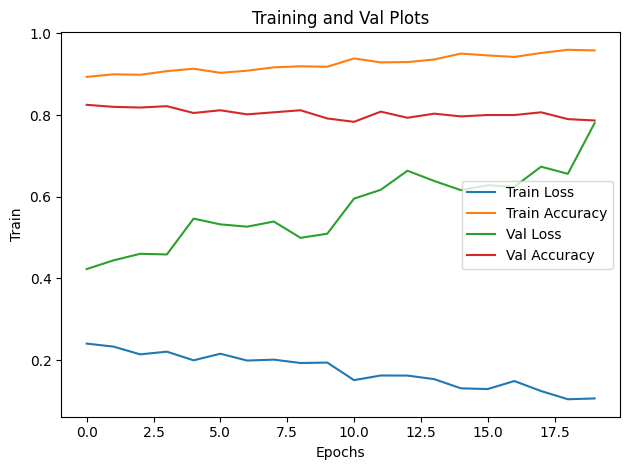

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.set_title('Training and Val Plots')
ax.plot(range(epochs), loss_train_history, label="Train Loss")
ax.plot(range(epochs), accuracy_train_history, label="Train Accuracy")
ax.plot(range(epochs), loss_val_history, label="Val Loss")
ax.plot(range(epochs), accuracy_val_history, label="Val Accuracy")
ax.set_xlabel("Epochs")
ax.set_ylabel("Train")
ax.legend()

fig.tight_layout()

You can use a fault tolerance technique where training resumes from a particular epoch. That is, if the training loop was interrupted in the middle of epoch 3 so the last checkpoint is from epoch 2, setting start_epoch = 3 above will do.

This action cannot be simulated in jupyter notebook because we cannot  halt the cell, anyway the code could be this.

---
**Stop and Continue**

---

```python
epochs = 10

loss_train_history = []
accuracy_train_history = []
loss_val_history = []
accuracy_val_history = []

#create directory for training metrics store
train_dir = create_train_dir()

start_epoch = 0
if start_epoch > 0:
    resume_epoch = start_epoch - 1
    resume(model, f"epoch-{resume_epoch}.pth")

for epoch in range(start_epoch, epochs):
  loss_train,acc_train = train(train_dataloader, model, criterion, optimizer)
  loss_train_history.append(loss_train)
  accuracy_train_history.append(acc_train)
  loss_val,acc_val= val(val_dataloader, model, criterion)
  loss_val_history.append(loss_val)
  accuracy_test_history.append(acc_val)
  checkpoint(model, os.path.join(train_dir, f"epoch-{epoch}.pth"))

# save metrics in a .CSV file.
with open(os.path.join(train_dir,'metrics_myCNN.csv'), 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Epoch', 'Train Loss', 'Train Accuracy', 'Test Loss', 'Test Accuracy'])
    for epoch, (train_loss, train_accuracy, val_loss, val_accuracy) in enumerate(zip(loss_train_history, accuracy_train_history, loss_test_history, accuracy_test_history)):
        writer.writerow([epoch+1, train_loss, train_accuracy, val_loss, val_accuracy])

print("Done!. Finished Training")
```



Sometimes, there are states outside of the model and you may want to checkpoint it as well. One particular example is the optimizer, which in cases like SDG or Adam, there are dynamically adjusted momentum. If you restarted your training loop, you may want to restore the momentum at the optimizer as well. It is not difficult to do. The idea is to make your `checkpoint()` function more complicated thanks to `torch.save()` and `torch.load()` function are backed by `pickle`, so you can use it with a list or dict container.

---
**Enhaced checkpoint and resume function**

---

In [ ]:
def checkpoint(model, filename):
    torch.save({
    'optimizer': optimizer.state_dict(),
    'model': model.state_dict(),
}, filename)

def resume(model, filename):
    model.load_state_dict(torch.load(filename)['model'])
    optimizer.load_state_dict(torch.load(filename)['optimizer'])


In [ ]:
loss_train_history = []
accuracy_train_history = []
loss_val_history = []
accuracy_val_history = []

#create directory for training metrics store
train_dir = create_train_dir()

start_epoch = 0
if start_epoch > 0:
    resume_epoch = start_epoch - 1
    resume(model, os.path.join(train_dir,f"epoch-{resume_epoch}.pth"))

for epoch in range(start_epoch, epochs):
  loss_train,acc_train = train(train_dataloader, model, criterion, optimizer)
  loss_train_history.append(loss_train)
  accuracy_train_history.append(acc_train)
  loss_val,acc_val= val(val_dataloader, model, criterion)
  loss_val_history.append(loss_val)
  accuracy_val_history.append(acc_val)
  checkpoint(model, os.path.join(train_dir,f"epoch-{epoch+1}.pth"))
print("Done!. Finished Training")

/content
Training directory: /content/train4
Training:


[1/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00, 10.09it/s, Accuracy=90.2%, Training_Loss=0.218]


Val: 
 Accuracy: 80.8%, val_Loss: 0.481825 

Training:


[2/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.83it/s, Accuracy=91.0%, Training_Loss=0.203]


Val: 
 Accuracy: 80.7%, val_Loss: 0.485883 

Training:


[3/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.87it/s, Accuracy=91.1%, Training_Loss=0.208]


Val: 
 Accuracy: 80.3%, val_Loss: 0.466395 

Training:


[4/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:10<00:00,  8.04it/s, Accuracy=92.4%, Training_Loss=0.19]


Val: 
 Accuracy: 81.0%, val_Loss: 0.509639 

Training:


[5/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:10<00:00,  7.87it/s, Accuracy=91.6%, Training_Loss=0.197]


Val: 
 Accuracy: 80.2%, val_Loss: 0.532461 

Training:


[6/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.89it/s, Accuracy=92.0%, Training_Loss=0.188]


Val: 
 Accuracy: 80.7%, val_Loss: 0.518488 

Training:


[7/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.53it/s, Accuracy=92.0%, Training_Loss=0.187]


Val: 
 Accuracy: 78.7%, val_Loss: 0.506807 

Training:


[8/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.92it/s, Accuracy=92.8%, Training_Loss=0.176]


Val: 
 Accuracy: 81.5%, val_Loss: 0.527181 

Training:


[9/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00, 10.04it/s, Accuracy=93.9%, Training_Loss=0.153]


Val: 
 Accuracy: 80.3%, val_Loss: 0.598756 

Training:


[10/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.85it/s, Accuracy=93.3%, Training_Loss=0.154]


Val: 
 Accuracy: 77.3%, val_Loss: 0.586801 

Training:


[11/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.03it/s, Accuracy=93.7%, Training_Loss=0.148]


Val: 
 Accuracy: 79.3%, val_Loss: 0.732292 

Training:


[12/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.20it/s, Accuracy=92.4%, Training_Loss=0.176]


Val: 
 Accuracy: 79.0%, val_Loss: 0.582091 

Training:


[13/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.85it/s, Accuracy=95.5%, Training_Loss=0.124]


Val: 
 Accuracy: 77.8%, val_Loss: 0.649590 

Training:


[14/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.60it/s, Accuracy=94.4%, Training_Loss=0.134]


Val: 
 Accuracy: 80.2%, val_Loss: 0.656206 

Training:


[15/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.89it/s, Accuracy=96.2%, Training_Loss=0.102]


Val: 
 Accuracy: 79.3%, val_Loss: 0.713444 

Training:


[16/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00, 10.58it/s, Accuracy=95.9%, Training_Loss=0.112]


Val: 
 Accuracy: 78.8%, val_Loss: 0.745382 

Training:


[17/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00, 10.24it/s, Accuracy=94.3%, Training_Loss=0.15]


Val: 
 Accuracy: 76.0%, val_Loss: 0.816489 

Training:


[18/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.95it/s, Accuracy=92.7%, Training_Loss=0.178]


Val: 
 Accuracy: 77.8%, val_Loss: 0.681621 

Training:


[19/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.67it/s, Accuracy=96.7%, Training_Loss=0.0998]


Val: 
 Accuracy: 79.3%, val_Loss: 0.778099 

Training:


[20/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.81it/s, Accuracy=95.9%, Training_Loss=0.103]


Val: 
 Accuracy: 74.0%, val_Loss: 0.931707 

Done!. Finished Training


---
**Displaying the metrics curves model (only 20 last epochs)**

---

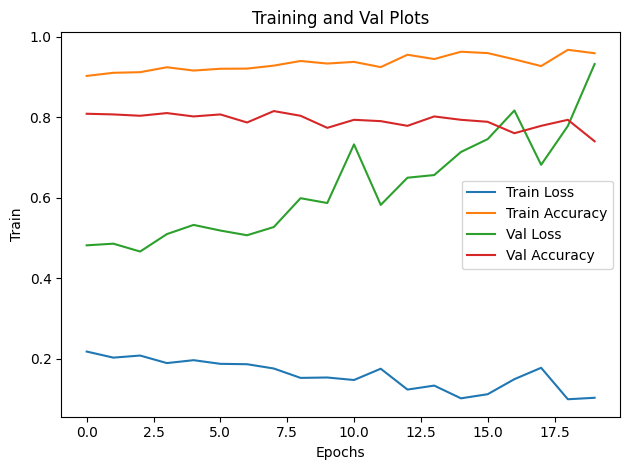

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.set_title('Training and Val Plots')
ax.plot(range(epochs), loss_train_history, label="Train Loss")
ax.plot(range(epochs), accuracy_train_history, label="Train Accuracy")
ax.plot(range(epochs), loss_val_history, label="Val Loss")
ax.plot(range(epochs), accuracy_val_history, label="Val Accuracy")
ax.set_xlabel("Epochs")
ax.set_ylabel("Train")
ax.legend()

fig.tight_layout()

Checkpointing is not only for fault tolerance. You can also use it to keep your best model. How to define what is the best is `subjective` but considering the score from the test set is a sensible method. Let’s say to keep only the best model ever found.

The variable `best_accuracy` is to keep track on the highest validation accuracy (`val_acc`) obtained so far, which is in a percentage range of 0 to 100. Whenever a higher accuracy is observed, the model is checkpointed to the file `best_model.pth`. The best model is restored after the entire training loop, via the `resume()` function which was created before.

Afterward, you can make predictions with the model on unseen data. Beware that, if you’re using a different metric for checkpointing, e.g., the cross entropy loss, the better model should come with a lower cross entropy. Thus you should keep track on the lowest cross entropy obtained.


The training loop can be modified as follows:

---
**Best Model**

---

In [ ]:
best_accuracy = -1


loss_train_history = []
accuracy_train_history = []
loss_val_history = []
accuracy_val_history = []

#create directory for training metrics store
train_dir = create_train_dir()

start_epoch = 0
if start_epoch > 0:
    resume_epoch = start_epoch - 1
    resume(model, os.path.join(train_dir,f"epoch-{resume_epoch}.pth"))

for epoch in range(start_epoch, epochs):
  loss_train,acc_train = train(train_dataloader, model, criterion, optimizer)
  loss_train_history.append(loss_train)
  accuracy_train_history.append(acc_train)
  loss_val,acc_val= val(val_dataloader, model, criterion)
  loss_val_history.append(loss_val)
  accuracy_val_history.append(acc_val)
  if acc_val > best_accuracy:
    best_accuracy = acc_val
    checkpoint(model, os.path.join(train_dir,f"epoch-{epoch+1}.pth"))
    print(f'best model in epoch:{epoch+1}')
print("Done!. Finished Training")

/content
Training directory: /content/train5
Training:


[1/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:10<00:00,  7.95it/s, Accuracy=95.6%, Training_Loss=0.11]


Val: 
 Accuracy: 78.8%, val_Loss: 0.710450 

best model in epoch:1
Training:


[2/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.17it/s, Accuracy=97.7%, Training_Loss=0.0651]


Val: 
 Accuracy: 79.2%, val_Loss: 0.791736 

best model in epoch:2
Training:


[3/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.99it/s, Accuracy=97.4%, Training_Loss=0.0701]


Val: 
 Accuracy: 72.5%, val_Loss: 0.957606 

Training:


[4/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.15it/s, Accuracy=97.1%, Training_Loss=0.0811]


Val: 
 Accuracy: 79.5%, val_Loss: 0.865822 

best model in epoch:4
Training:


[5/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:10<00:00,  8.15it/s, Accuracy=98.4%, Training_Loss=0.0484]


Val: 
 Accuracy: 79.5%, val_Loss: 0.962012 

Training:


[6/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.81it/s, Accuracy=98.3%, Training_Loss=0.0479]


Val: 
 Accuracy: 78.7%, val_Loss: 0.954513 

Training:


[7/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 11.05it/s, Accuracy=98.0%, Training_Loss=0.0551]


Val: 
 Accuracy: 77.5%, val_Loss: 0.965610 

Training:


[8/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.79it/s, Accuracy=96.6%, Training_Loss=0.097]


Val: 
 Accuracy: 80.0%, val_Loss: 0.874341 

best model in epoch:8
Training:


[9/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.39it/s, Accuracy=99.1%, Training_Loss=0.0353]


Val: 
 Accuracy: 78.7%, val_Loss: 1.027644 

Training:


[10/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.86it/s, Accuracy=97.0%, Training_Loss=0.0843]


Val: 
 Accuracy: 78.5%, val_Loss: 0.819568 

Training:


[11/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.91it/s, Accuracy=98.8%, Training_Loss=0.0456]


Val: 
 Accuracy: 78.2%, val_Loss: 0.987272 

Training:


[12/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.84it/s, Accuracy=98.9%, Training_Loss=0.0351]


Val: 
 Accuracy: 79.3%, val_Loss: 1.091873 

Training:


[13/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00, 10.30it/s, Accuracy=99.9%, Training_Loss=0.0128]


Val: 
 Accuracy: 77.3%, val_Loss: 1.191144 

Training:


[14/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00, 10.29it/s, Accuracy=99.9%, Training_Loss=0.0109]


Val: 
 Accuracy: 79.3%, val_Loss: 1.169720 

Training:


[15/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.77it/s, Accuracy=100.0%, Training_Loss=0.00509]


Val: 
 Accuracy: 79.0%, val_Loss: 1.271834 

Training:


[16/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.25it/s, Accuracy=100.0%, Training_Loss=0.00321]


Val: 
 Accuracy: 78.2%, val_Loss: 1.326500 

Training:


[17/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 11.09it/s, Accuracy=100.0%, Training_Loss=0.00255]


Val: 
 Accuracy: 78.2%, val_Loss: 1.376395 

Training:


[18/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.86it/s, Accuracy=100.0%, Training_Loss=0.00213]


Val: 
 Accuracy: 78.3%, val_Loss: 1.417468 

Training:


[19/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.83it/s, Accuracy=100.0%, Training_Loss=0.00179]


Val: 
 Accuracy: 78.2%, val_Loss: 1.441863 

Training:


[20/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.91it/s, Accuracy=100.0%, Training_Loss=0.00154]


Val: 
 Accuracy: 78.3%, val_Loss: 1.471983 

Done!. Finished Training


---
**Displaying the metrics curves model (only 20 last epochs)**

---

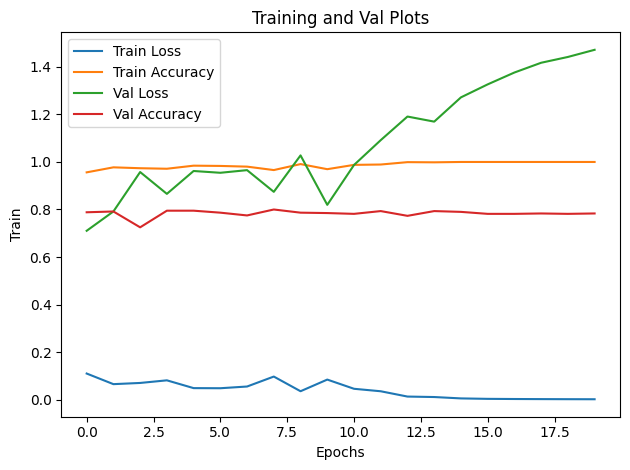

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.set_title('Training and Val Plots')
ax.plot(range(epoch+1), loss_train_history, label="Train Loss")
ax.plot(range(epoch+1), accuracy_train_history, label="Train Accuracy")
ax.plot(range(epoch+1), loss_val_history, label="Val Loss")
ax.plot(range(epoch+1), accuracy_val_history, label="Val Accuracy")
ax.set_xlabel("Epochs")
ax.set_ylabel("Train")
ax.legend()

fig.tight_layout()

You can also checkpoint the model per epoch unconditionally together with the best model checkpointing, as you are free to create multiple checkpoint files. Since the code above is the find the best model and make a copy of it, you may usually see a further optimization to the training loop by stopping it early if the hope to see model improvement is slim. This is the early stopping technique that can save time in training.

The code above validates the model with test set at the end of each epoch and keeps the best model found into a checkpoint file. The simplest strategy for early stopping is to set up a threshold of
 epochs. If you didn’t see the model improved over the last
 epochs, you terminate the training loop in the middle. This can be implemented as follows:

 ---
 **Best Model and Early Stopping**

 ---

In [ ]:
early_stop_thresh = 7
best_accuracy = -1
best_epoch = -1


loss_train_history = []
accuracy_train_history = []
loss_val_history = []
accuracy_val_history = []

#create directory for training metrics store
train_dir = create_train_dir()


for epoch in range(epochs):
  loss_train,acc_train = train(train_dataloader, model, criterion, optimizer)
  loss_train_history.append(loss_train)
  accuracy_train_history.append(acc_train)
  loss_test,acc_test= val(val_dataloader, model, criterion)
  loss_val_history.append(loss_val)
  accuracy_val_history.append(acc_val)
  if acc_val > best_accuracy:
    best_accuracy = acc_val
    best_epoch = epoch+1
    checkpoint(model, os.path.join(train_dir,"best_model.pth"))
    print(f'best model in epoch={epoch+1} with Accuracy={(100*acc_val):>0.1f}%')
  elif epoch - best_epoch >= early_stop_thresh:
    print(f"Early stopped training at epoch {epoch+1} due to {early_stop_thresh} epochs whitout enhacement")
    break  # terminate the training loop
print("Done!. Finished Training")

/content
Training directory: /content/train6
Training:


[1/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.87it/s, Accuracy=100.0%, Training_Loss=0.00167]


Val: 
 Accuracy: 77.3%, val_Loss: 1.500747 

best model in epoch=1 with Accuracy=78.3%
Training:


[2/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00, 10.52it/s, Accuracy=100.0%, Training_Loss=0.00133]


Val: 
 Accuracy: 77.7%, val_Loss: 1.519441 

Training:


[3/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00, 10.01it/s, Accuracy=100.0%, Training_Loss=0.00122]


Val: 
 Accuracy: 77.3%, val_Loss: 1.537959 

Training:


[4/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:11<00:00,  7.58it/s, Accuracy=100.0%, Training_Loss=0.00111]


Val: 
 Accuracy: 78.0%, val_Loss: 1.555562 

Training:


[5/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.75it/s, Accuracy=100.0%, Training_Loss=0.00109]


Val: 
 Accuracy: 78.0%, val_Loss: 1.565520 

Training:


[6/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.74it/s, Accuracy=100.0%, Training_Loss=0.00104]


Val: 
 Accuracy: 78.0%, val_Loss: 1.586744 

Training:


[7/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.93it/s, Accuracy=100.0%, Training_Loss=0.000929]


Val: 
 Accuracy: 77.7%, val_Loss: 1.597916 

Training:


[8/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.70it/s, Accuracy=100.0%, Training_Loss=0.000892]


Val: 
 Accuracy: 77.5%, val_Loss: 1.615943 

Training:


[9/20 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.86it/s, Accuracy=100.0%, Training_Loss=0.000876]


Val: 
 Accuracy: 77.2%, val_Loss: 1.614143 

Early stopped training at epoch 9 due to 7 epochs whitout enhacement
Done!. Finished Training


---
**Displaying the metrics curves model (only 20 last epochs)**

---

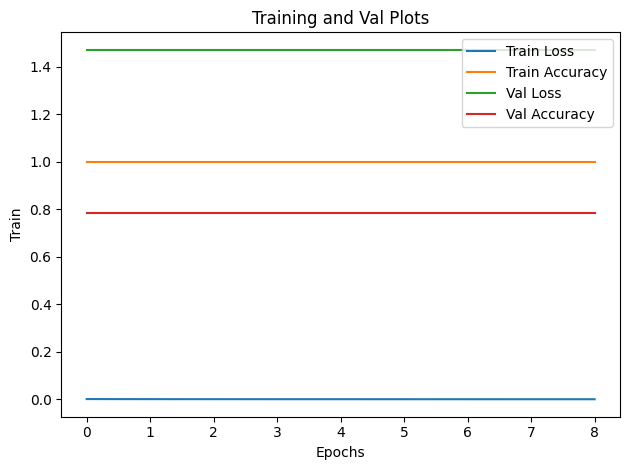

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.set_title('Training and Val Plots')
ax.plot(range(epoch+1), loss_train_history, label="Train Loss")
ax.plot(range(epoch+1), accuracy_train_history, label="Train Accuracy")
ax.plot(range(epoch+1), loss_val_history, label="Val Loss")
ax.plot(range(epoch+1), accuracy_val_history, label="Val Accuracy")
ax.set_xlabel("Epochs")
ax.set_ylabel("Train")
ax.legend()

fig.tight_layout()

---
**Download the file to your local machine**

---

In [ ]:
from google.colab import files

files.download(os.path.join(train_dir,f"best_model.pth"))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Validating our model


---
**Validation Metrics**

---

In [ ]:
# Supongamos que tienes tu modelo entrenado y los conjuntos de datos divididos
val_dataloader = DataLoader(
  val_set,
  batch_size=batch_size,
  shuffle=False,
  num_workers=2)


import torch
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix

# Define una función para obtener las predicciones del modelo
def obtener_predicciones(modelo, dataloader):
    preds = []
    etiquetas = []
    for batch in dataloader:
        inputs, etiquetas_batch = batch
        inputs = inputs.to(device)  # Si estás utilizando GPU, mueve los datos a la GPU
        outputs = modelo(inputs)
        _, predicciones = torch.max(outputs, 1)
        preds.extend(predicciones.tolist())
        etiquetas.extend(etiquetas_batch.tolist())
    return preds, etiquetas

# Define el dispositivo (CPU o GPU) en el que se realizarán las operaciones
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Cargar el modelo guardado
model_file = os.path.join(train_dir,f"best_model.pth")
checkpoint = torch.load(model_file, map_location=device)
model_state_dict = checkpoint['model']

# Supongamos que 'val_dataloader' es tu DataLoader de validación

# Definir y cargar el modelo
# Asegúrate de definir tu modelo adecuadamente
model = myCNN()
model.load_state_dict(model_state_dict)
model.to(device)
model.eval()

# Obtén las predicciones del modelo y las etiquetas verdaderas del conjunto de validación
predicciones_val, etiquetas_val = obtener_predicciones(model, val_dataloader)

# Calcular la matriz de confusión
cm = confusion_matrix(etiquetas_val, predicciones_val)

# Extraer los valores de la matriz de confusión
tn, fp, fn, tp = cm.ravel()

# Imprimir los valores
print("Verdaderos negativos (TN):", tn)
print("Falsos positivos (FP):", fp)
print("Falsos negativos (FN):", fn)
print("Verdaderos positivos (TP):", tp)


Verdaderos negativos (TN): 226
Falsos positivos (FP): 74
Falsos negativos (FN): 62
Verdaderos positivos (TP): 238


---
**Get confusion metrics**

---

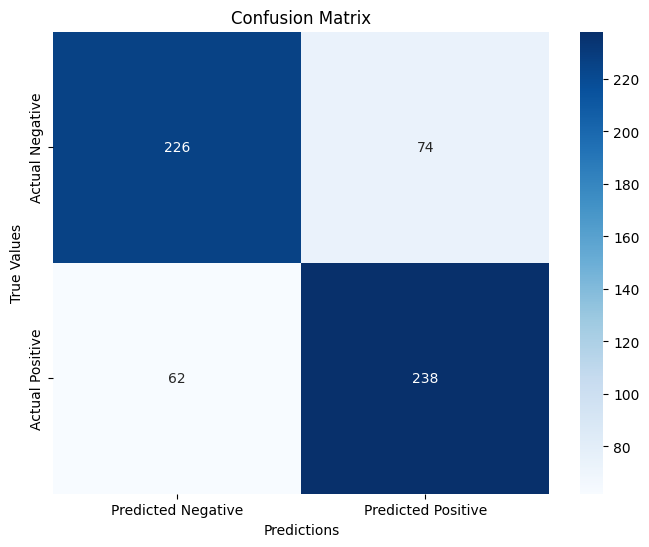

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming 'etiquetas_val' are the true labels and 'predicciones_val' are the model predictions

# Calculate the confusion matrix
cm = confusion_matrix(etiquetas_val, predicciones_val)

# Create a Pandas DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.show()

---

**Display a ROC curve**

---


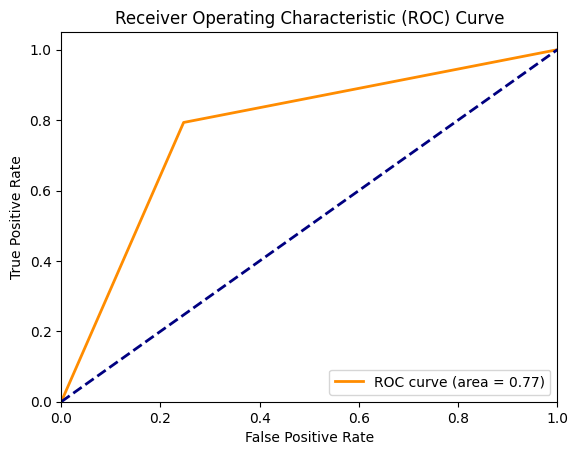

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

# Supongamos que 'predicciones_val' y 'etiquetas_val' son las predicciones y etiquetas verdaderas del conjunto de validación
# Obtenidas previamente usando la función obtener_predicciones()

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(etiquetas_val, predicciones_val)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
